In [4]:
import pandas as pd

Reads in the building permit data and displays the neighborhoods with the most building permits in the month of March.

Text(0.5, 0, 'Permits')

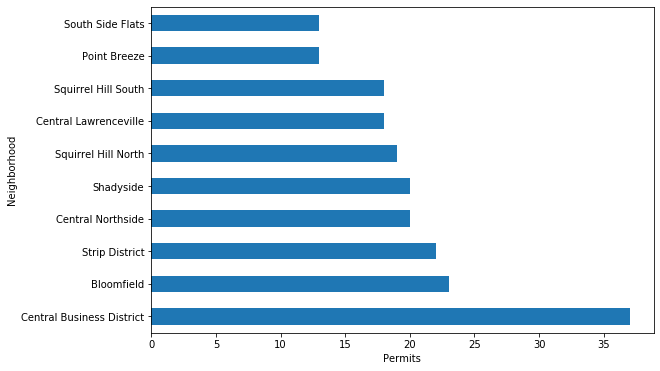

In [5]:
permit_data = pd.read_csv('pli-permit-summary-3.2020.csv')
permit_data = permit_data.groupby('SNP_NEIGHBORHOOD').size()
permit_data = pd.DataFrame({'Neighborhood':permit_data.index, 'Permits':permit_data.values})
permit_data = permit_data.sort_values(by=['Permits'], ascending=False)
permit_data.head(10).plot.barh(x='Neighborhood', legend=False, figsize=(9, 6)).set_xlabel('Permits')

Reads in the population data and merges it with the permit data. Next, calculates the People Per Permit metric by dividing the population by the number of permits for each neighborhood, and displays the neighborhoods with the best People Per Permit metric that have a population over 2000.

In [7]:
population_data = pd.read_csv('total-population.csv')
combined_permit_data = pd.merge(permit_data, population_data)
combined_permit_data.drop(['Id', 'Margin of Error; Total'], inplace=True, axis=1)
combined_permit_data.columns.values[2] = 'Population'
combined_permit_data['People Per Permit'] = combined_permit_data.apply(lambda x: int(x.Population / x.Permits), axis=1)
combined_permit_data = combined_permit_data.set_index('Neighborhood')
refined_permit_data = combined_permit_data[combined_permit_data['Population'] > 2000]
refined_permit_data.sort_values(by=['People Per Permit'], ascending=True).head(10)

,Permits,Population,People Per Permit
Neighborhood,,,
Central Business District,37,4060,109
Central Northside,20,2892,144
East Allegheny,10,2095,209
Upper Lawrenceville,13,2754,211
Central Lawrenceville,18,4775,265
Lower Lawrenceville,8,2572,321
Crawford-Roberts,6,2225,370
Bloomfield,23,8669,376
Troy Hill,6,2283,380


Displays the neighborhoods with the worst People Per Permit metric that have a population over 2000.

In [8]:
refined_permit_data.sort_values(by=['People Per Permit'], ascending=False).head(10)

,Permits,Population,People Per Permit
Neighborhood,,,
Sheraden,1,5684,5684
Carrick,2,10122,5061
Overbrook,1,3682,3682
Brookline,4,13160,3290
Allentown,1,2558,2558
Spring Hill-City View,1,2456,2456
South Side Slopes,2,4583,2291
Brighton Heights,4,7421,1855
Lincoln Place,2,3499,1749


In [2]:
import geopandas as gpd

Graphically displays the neighborhoods' People Per Permit metric using a choropleth map.

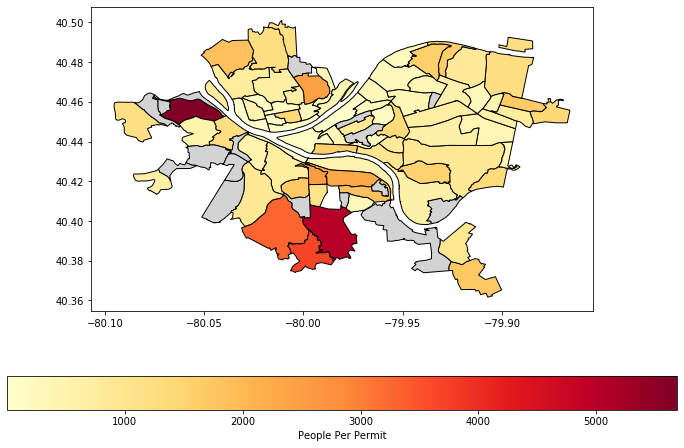

In [10]:
neighborhoods = gpd.read_file('Neighborhoods_.shp')
neighborhoods = neighborhoods.merge(combined_permit_data, how='left', left_on='hood', right_on='Neighborhood')
neighborhoods.plot(column='People Per Permit', cmap='YlOrRd', edgecolor='black', legend=True,
                 legend_kwds={'label':'People Per Permit', 'orientation':'horizontal'},
                 figsize=(12, 8), missing_kwds={'color':'lightgray'})